## Распознование изображении из набора данных MNIST, CIFAR-10 и базы автомобилеей с помощью свёрточных нейронных сетей

#### Импорт библиотек для работы всего ноутбука

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import zipfile
import os

%matplotlib inline

# Распознавание изображений из набора данных MNIST 

**Подготовка данных**

In [5]:
# Загружаем mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

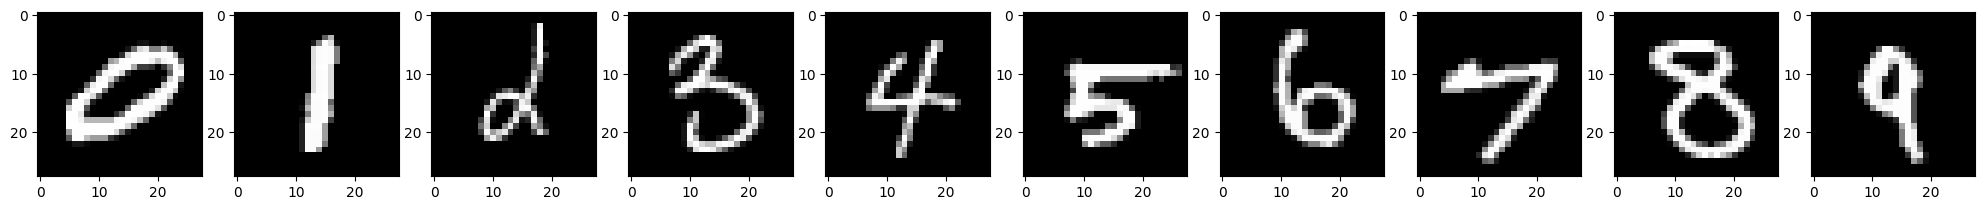

In [7]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize = (25, 3)) # Создаем полотно из 10 графиков
for i in range(10): # Проходим по классам от 0 до 9
    label_indexes = np.where(y_train == i)[0] # Получаем полный список из индексов положений класса i в y_train
    index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
    img = x_train[index] # Выбираем из x_train нужное изображение 
    axs[i].imshow(Image.fromarray(img), cmap = 'gray') # Отображаем изображение i-ым графиком

plt.show() # Показываем изображение

In [8]:
# Превращаем y_train и y_test в формат one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

#Меняем формат данных MNIST
# Надо добавить в конце размерность 1
# Чтобы сверточная сеть понимала, что это черно-белые данные
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28 ,28, 1)

In [9]:
# Посмотрим форматы выборок перед обучением
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Нейронная сеть**

In [10]:
# Задаем batch_size
batch_size = 128

# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
# Второй сверточный слой
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляции Dropout
model.add(Dropout(0.25))

model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(256, activation='relu'))
# Слой для регуляции Dropout
model.add(Dropout(0.25))
# Выходной полносвязный слой 
model.add(Dense(10, activation = 'softmax'))
# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])



c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,618,026 (6.17 MB)

 Trainable params: 1,618,026 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8562 - loss: 2.2507 - val_accuracy: 0.9780 - val_loss: 0.0648
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9748 - loss: 0.0808 - val_accuracy: 0.9836 - val_loss: 0.0469
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9834 - loss: 0.0540 - val_accuracy: 0.9848 - val_loss: 0.0488
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9860 - loss: 0.0435 - val_accuracy: 0.9872 - val_loss: 0.0438
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9881 - loss: 0.0363 - val_accuracy: 0.9869 - val_loss: 0.0376
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9900 - loss: 0.0307 - val_accuracy: 0.9863 - val_loss: 0.0442
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9915 - loss: 0.0267 - val_accuracy: 0.9881 - val_loss: 0.0476
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accu

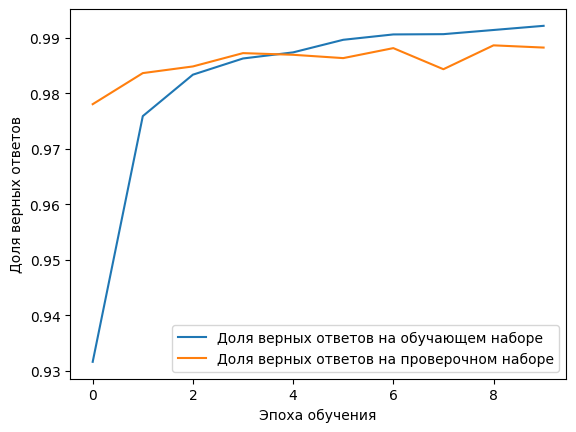

In [12]:
# Обучаем сеть на данных mnist
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отображаем график точности обучения 
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Определение цифр из тестовой выборки**

In [13]:
# Выбираем номер пример
n = np.random.randint(x_test.shape[0])
# Получаем выход сети на этом примере
prediction = model.predict(x_test)

# Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", np.argmax(y_test[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Выход сети:  [2.9445969e-14 5.9270944e-10 3.1492986e-13 2.3820571e-10 1.0935547e-08
 9.3111597e-13 1.8198101e-15 1.0000000e+00 1.1016028e-10 2.1716801e-08]
Распознанная цифра:  7
Верный ответ:  7


**Определение цифр на реальных фотографиях**

In [ ]:
# Укажите путь к архиву
archive = zipfile.ZipFile(r'C:\Projects\Neural_networks\3\digits.zip')

# Извлечем файлы, начинающиеся с "digits", в целевую папку
for file in archive.namelist():
    if file.startswith('digits'):
        archive.extract(file, r'C:\Projects\Neural_networks-1')  # Укажите здесь реальный путь назначения

archive.close()  # Закрываем архив


In [ ]:
# Выводим для примера картинки по каждому классу

def change_contrast(img, factor): # Функция для увеличения контрастности
    def contrast(pixel): # Функция для изменения цвета пикселя
    # Изменяем цвет каждого пикселя следующим обоазом.
    # Если цвет пикселя в численной мере меньше 128, то значение будет уменьшаться
    # на меру factor * (pixel - 128). Иначе - увеличивается на эту меру
    # Очевидно, что чем сильнее цвет отличен от 128, тем сильнее он измениться
        return 128 + factor * (pixel - 128)
    return img.point(contrast)

xTestReal = [] # Создаем x_test для загруженных картинок
yTestReal = [] # Создаем y_test для классов изображении

for i in range(10): # Проходим по класам от 0 до 9
    img_path = 'digits/' + str(i) + '.png' # Определяем имя изображения
    # Загружаем изображение, изменяя его размер на размер входного массива нейросети
    # Другими словами, подгоняем изображение к размеру картинок, на которых обучалась сеть
    # Указываем color_mode='grayscale' для того, чтобы цвет пикселя задавался одним числом
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    img1 = change_contrast(img, factor=5.0) # Увеличиваем контрастность изображения
    xTestReal.append(255 - np.asarray(img1)) # Инвентируем изображение и добавляем в выборку
    yTestReal.append(i) # Добавляем в y_train номера классов

xTestReal = np.array(xTestReal) # Преобразуем в Numpy array
yTestReal = np.array(yTestReal) # Преобразуем в Numpy array

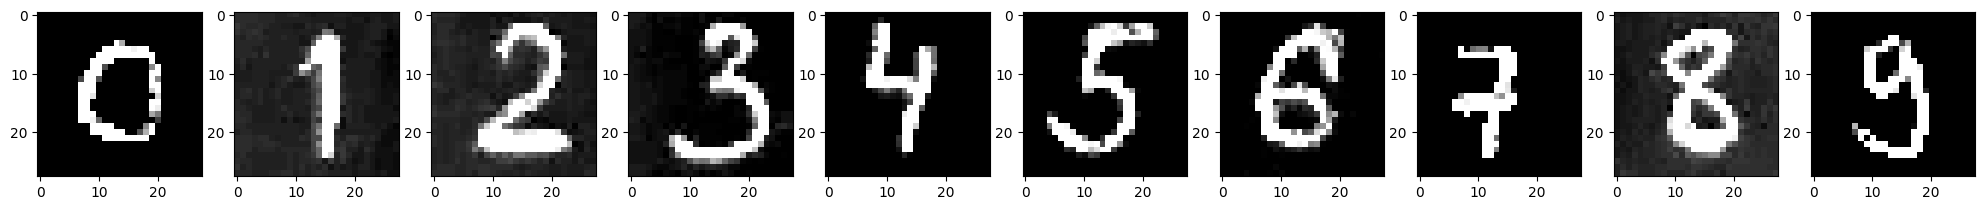

In [21]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # Создаем полотно из 10 графиков
for i in  range(10): # Проходим по классам от 0 до 9
    axs[i].imshow(Image.fromarray(xTestReal[i]), cmap='gray') # Конвентируем изображение в черно-белый формат и отображаем i-ым графиком

plt.show() # Плказываем изображения

In [22]:
# Меняем формат данных, как делали это с mnist
xTestReal = xTestReal.reshape(xTestReal.shape[0], 28, 28, 1)

In [25]:
prediction = model.predict(xTestReal) # Классифицируем каждое изображение
for i in range(10): # Проходим по картинкам
    # Выводим результаты на экран
    print("Распознанный образ:", np.argmax(prediction[i]), '. Верный ответ', yTestReal[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Распознанный образ: 0 . Верный ответ 0
Распознанный образ: 9 . Верный ответ 1
Распознанный образ: 2 . Верный ответ 2
Распознанный образ: 3 . Верный ответ 3
Распознанный образ: 4 . Верный ответ 4
Распознанный образ: 5 . Верный ответ 5
Распознанный образ: 6 . Верный ответ 6
Распознанный образ: 7 . Верный ответ 7
Распознанный образ: 8 . Верный ответ 8
Распознанный образ: 9 . Верный ответ 9
